## <font color = Navy > __Churn Model__ </font>
#### Case :
Trying to predict whether a customer in a bank is more likely to leave the bank or stay with it using the past record of 10000 customers.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.models import load_model

In [3]:
data = pd.read_csv('./Churn_Modelling.csv', sep = ',')

In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### *Feature Matrix*

In [5]:
X = data.iloc[:,3:-1].values
X[:10]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 'Spain', 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 'France', 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 'Germany', 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 'France', 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 'France', 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

### *Labels*

In [6]:
Y = data.iloc[:,-1].values
Y[:10]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

##### Preprocessing:
1. Encoding the Categorical data
2. Using standardisation on encoded dataset

In [7]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
scl = StandardScaler()
label_x_1 = LabelEncoder()
oneHot = OneHotEncoder(categorical_features=[1])
X[:,1] = label_x_1.fit_transform(X[:,1])
X[:,2] = label_x_1.fit_transform(X[:,2])

/home/pratik/anaconda3/envs/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/pratik/anaconda3/envs/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/pratik/anaconda3/envs/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [8]:
X = oneHot.fit_transform(X).toarray()

/home/pratik/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/pratik/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [9]:
X[1]

array([0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 6.0800000e+02,
       0.0000000e+00, 4.1000000e+01, 1.0000000e+00, 8.3807860e+04,
       1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.1254258e+05])

In [10]:
X = X[:,1:]

In [11]:
X = scl.fit_transform(X)

In [12]:
X[:2]

array([[-0.57873591, -0.57380915, -0.32622142, -1.09598752,  0.29351742,
        -1.04175968, -1.22584767, -0.91158349,  0.64609167,  0.97024255,
         0.02188649],
       [-0.57873591,  1.74273971, -0.44003595, -1.09598752,  0.19816383,
        -1.38753759,  0.11735002, -0.91158349, -1.54776799,  0.97024255,
         0.21653375]])

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, shuffle = True )

/home/pratik/anaconda3/envs/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/pratik/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Predicting Churn yusing an ANN 

In [14]:
classifier = Sequential()
classifier.add(Dense(input_dim = 11, units = 6, activation = 'relu', kernel_initializer = 'uniform' ))

classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'uniform' ))
classifier.add(Dropout(rate = 0.2))
# classifier.add(Dense(units = 4, activation = 'relu', kernel_initializer = 'uniform' ))
# classifier.add(Dropout(rate = 0.2))
classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform' ))

classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [30]:
class MyCallBack(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('acc') >= 0.9):
            print("\n Differences in Validation and training accuracies increasing, so cancelling training!")
            self.model.stop_training = True
            

In [31]:
callback = MyCallBack()

In [32]:
classifier.fit(x_train, y_train, batch_size=32, epochs=150, shuffle = True, callbacks=[callback])

Epoch 1/150
8000/8000 [==============================] - 0s 59us/step - loss: 0.4241 - acc: 0.8326
Epoch 2/150
8000/8000 [==============================] - 0s 54us/step - loss: 0.4231 - acc: 0.8316
Epoch 3/150
8000/8000 [==============================] - 0s 57us/step - loss: 0.4283 - acc: 0.8303
Epoch 4/150
8000/8000 [==============================] - 0s 55us/step - loss: 0.4239 - acc: 0.8313
Epoch 5/150
8000/8000 [==============================] - 0s 55us/step - loss: 0.4249 - acc: 0.8304
Epoch 6/150
8000/8000 [==============================] - 0s 55us/step - loss: 0.4259 - acc: 0.8329
Epoch 7/150
8000/8000 [==============================] - 0s 55us/step - loss: 0.4264 - acc: 0.8322
Epoch 8/150
8000/8000 [==============================] - 0s 55us/step - loss: 0.4260 - acc: 0.8326
Epoch 9/150
8000/8000 [==============================] - 0s 56us/step - loss: 0.4245 - acc: 0.8303
Epoch 10/150
8000/8000 [==============================] - 0s 55us/step - loss: 0.4243 - acc: 0.8321
Epoch 11/

8000/8000 [==============================] - 0s 55us/step - loss: 0.4207 - acc: 0.8342
Epoch 84/150
8000/8000 [==============================] - 0s 50us/step - loss: 0.4216 - acc: 0.8359
Epoch 85/150
8000/8000 [==============================] - 1s 64us/step - loss: 0.4242 - acc: 0.8316
Epoch 86/150
8000/8000 [==============================] - 0s 56us/step - loss: 0.4238 - acc: 0.8334
Epoch 87/150
8000/8000 [==============================] - 0s 53us/step - loss: 0.4255 - acc: 0.8329
Epoch 88/150
8000/8000 [==============================] - 0s 51us/step - loss: 0.4220 - acc: 0.8337
Epoch 89/150
8000/8000 [==============================] - 0s 62us/step - loss: 0.4219 - acc: 0.8359
Epoch 90/150
8000/8000 [==============================] - 1s 68us/step - loss: 0.4212 - acc: 0.8364
Epoch 91/150
8000/8000 [==============================] - 0s 61us/step - loss: 0.4209 - acc: 0.8341
Epoch 92/150
8000/8000 [==============================] - 0s 54us/step - loss: 0.4263 - acc: 0.8345
Epoch 93/150


In [38]:
classifier.save('Churn_Classifier.h5')

In [39]:
y_pred = classifier.predict(x_test)

In [40]:
y_pred = (y_pred > 0.5)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [42]:
cm

array([[1567,   41],
       [ 279,  113]])

Text(33.0, 0.5, 'Predicted')

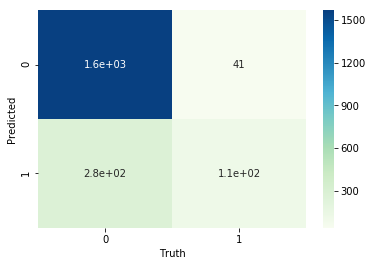

In [43]:
sea.heatmap(cm, annot= True, cmap='GnBu')
plt.xlabel('Truth')
plt.ylabel('Predicted')

### <font color = Navy >_New Prediction_</font>

Predict if the customer with the following informations will leave the bank:  
Geography: France  
Credit Score: 800  
Gender: Female  
Age: 32  
Tenure: 2  
Balance: 120000  
Number of Products: 1  
Has Credit Card: Yes  
Is Active Member: Yes  
Estimated Salary: 140000  

In [44]:
new_pred = classifier.predict(scl.transform(np.array([[0, 0, 800, 0, 32, 2,120000, 1, 1, 1, 140000 ]])))
new_pred 

/home/pratik/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.05479531]], dtype=float32)

Thus, the customer stayed with the bank.

### Improving the validity of results using cross-validation 

In [45]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
def build_classifier():
    classifier = Sequential()
    # input Layer and first inner layer with 6 nodes
    classifier.add(Dense(input_dim = 11, units = 6, activation = 'relu', kernel_initializer = 'uniform' ))
    classifier.add(Dropout(rate = 0.1))
    # second Layer 
    classifier.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'uniform' ))
    classifier.add(Dropout(rate = 0.2))
    # output Layer
    classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform' ))

    classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier


In [54]:
classifier = KerasClassifier(build_fn=build_classifier,batch_size=32, epochs=150, shuffle = True )

In [55]:
accuracy = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10, n_jobs=-1)

Epoch 1/150
7200/7200 [==============================] - 2s 307us/step - loss: 0.6114 - acc: 0.7910
Epoch 2/150
7200/7200 [==============================] - 1s 98us/step - loss: 0.4666 - acc: 0.7939
Epoch 3/150
7200/7200 [==============================] - 1s 175us/step - loss: 0.4566 - acc: 0.7939
Epoch 4/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.4519 - acc: 0.7939
Epoch 5/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.4512 - acc: 0.7939
Epoch 6/150
7200/7200 [==============================] - 1s 171us/step - loss: 0.4514 - acc: 0.7939
Epoch 7/150
7200/7200 [==============================] - 1s 181us/step - loss: 0.4482 - acc: 0.7939
Epoch 8/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.4464 - acc: 0.7939
Epoch 9/150
7200/7200 [==============================] - 1s 182us/step - loss: 0.4459 - acc: 0.7939
Epoch 10/150
7200/7200 [==============================] - 1s 180us/step - loss: 0.4465 - acc: 0.7939


7200/7200 [==============================] - 1s 167us/step - loss: 0.4374 - acc: 0.7939
Epoch 83/150
7200/7200 [==============================] - 1s 147us/step - loss: 0.4391 - acc: 0.7939
Epoch 84/150
7200/7200 [==============================] - 1s 157us/step - loss: 0.4406 - acc: 0.7939
Epoch 85/150
7200/7200 [==============================] - 1s 161us/step - loss: 0.4429 - acc: 0.7939
Epoch 86/150
7200/7200 [==============================] - 1s 170us/step - loss: 0.4451 - acc: 0.7939
Epoch 87/150
7200/7200 [==============================] - 1s 164us/step - loss: 0.4432 - acc: 0.7939
Epoch 88/150
7200/7200 [==============================] - 1s 153us/step - loss: 0.4448 - acc: 0.7939
Epoch 89/150
7200/7200 [==============================] - 1s 206us/step - loss: 0.4401 - acc: 0.7939
Epoch 90/150
7200/7200 [==============================] - 1s 159us/step - loss: 0.4427 - acc: 0.7939
Epoch 91/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.4396 - acc: 0.7939
Epo

7200/7200 [==============================] - 1s 182us/step - loss: 0.4469 - acc: 0.7939
Epoch 13/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.4457 - acc: 0.7939
Epoch 14/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.4449 - acc: 0.7939
Epoch 15/150
7200/7200 [==============================] - 1s 170us/step - loss: 0.4476 - acc: 0.7939
Epoch 16/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.4489 - acc: 0.7939
Epoch 17/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.4447 - acc: 0.7939
Epoch 18/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4475 - acc: 0.7939
Epoch 19/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4430 - acc: 0.7939
Epoch 20/150
7200/7200 [==============================] - 1s 202us/step - loss: 0.4431 - acc: 0.7939
Epoch 21/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.4446 - acc: 0.7939
Epo

7200/7200 [==============================] - 1s 201us/step - loss: 0.4388 - acc: 0.7939
Epoch 94/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.4446 - acc: 0.7939
Epoch 95/150
7200/7200 [==============================] - 1s 161us/step - loss: 0.4431 - acc: 0.7939
Epoch 96/150
7200/7200 [==============================] - 1s 166us/step - loss: 0.4439 - acc: 0.7939
Epoch 97/150
7200/7200 [==============================] - 1s 170us/step - loss: 0.4398 - acc: 0.7939
Epoch 98/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.4404 - acc: 0.7939
Epoch 99/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4391 - acc: 0.7939
Epoch 100/150
7200/7200 [==============================] - 1s 181us/step - loss: 0.4381 - acc: 0.7939
Epoch 101/150
7200/7200 [==============================] - 1s 172us/step - loss: 0.4418 - acc: 0.7939
Epoch 102/150
7200/7200 [==============================] - 1s 179us/step - loss: 0.4383 - acc: 0.7939


7200/7200 [==============================] - 1s 156us/step - loss: 0.4257 - acc: 0.8313
Epoch 24/150
7200/7200 [==============================] - 1s 166us/step - loss: 0.4264 - acc: 0.8288
Epoch 25/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4266 - acc: 0.8301
Epoch 26/150
7200/7200 [==============================] - 2s 210us/step - loss: 0.4262 - acc: 0.8300
Epoch 27/150
7200/7200 [==============================] - 2s 218us/step - loss: 0.4256 - acc: 0.8282
Epoch 28/150
7200/7200 [==============================] - 2s 239us/step - loss: 0.4234 - acc: 0.8314
Epoch 29/150
7200/7200 [==============================] - 1s 199us/step - loss: 0.4223 - acc: 0.8325
Epoch 30/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.4249 - acc: 0.8289
Epoch 31/150
7200/7200 [==============================] - 2s 216us/step - loss: 0.4240 - acc: 0.8310
Epoch 32/150
7200/7200 [==============================] - 2s 220us/step - loss: 0.4237 - acc: 0.8319
Epo

7200/7200 [==============================] - 1s 187us/step - loss: 0.4234 - acc: 0.8329
Epoch 105/150
7200/7200 [==============================] - 1s 195us/step - loss: 0.4202 - acc: 0.8340
Epoch 106/150
7200/7200 [==============================] - 1s 173us/step - loss: 0.4213 - acc: 0.8319
Epoch 107/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.4236 - acc: 0.8319
Epoch 108/150
7200/7200 [==============================] - 2s 209us/step - loss: 0.4204 - acc: 0.8349
Epoch 109/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.4198 - acc: 0.8331
Epoch 110/150
7200/7200 [==============================] - 1s 174us/step - loss: 0.4198 - acc: 0.8318
Epoch 111/150
7200/7200 [==============================] - 1s 182us/step - loss: 0.4213 - acc: 0.8328
Epoch 112/150
7200/7200 [==============================] - 1s 180us/step - loss: 0.4229 - acc: 0.8342
Epoch 113/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.4178 - acc: 0

7200/7200 [==============================] - 1s 169us/step - loss: 0.4255 - acc: 0.8265
Epoch 35/150
7200/7200 [==============================] - 2s 213us/step - loss: 0.4261 - acc: 0.8264
Epoch 36/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.4277 - acc: 0.8279
Epoch 37/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4321 - acc: 0.8275
Epoch 38/150
7200/7200 [==============================] - 1s 186us/step - loss: 0.4285 - acc: 0.8261
Epoch 39/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4244 - acc: 0.8304
Epoch 40/150
7200/7200 [==============================] - 1s 162us/step - loss: 0.4284 - acc: 0.8275
Epoch 41/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4292 - acc: 0.8276
Epoch 42/150
7200/7200 [==============================] - 1s 199us/step - loss: 0.4311 - acc: 0.8286
Epoch 43/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.4287 - acc: 0.8297
Epo

7200/7200 [==============================] - 1s 191us/step - loss: 0.4223 - acc: 0.8311
Epoch 116/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.4235 - acc: 0.8322
Epoch 117/150
7200/7200 [==============================] - 1s 180us/step - loss: 0.4220 - acc: 0.8317
Epoch 118/150
7200/7200 [==============================] - 1s 196us/step - loss: 0.4251 - acc: 0.8294
Epoch 119/150
7200/7200 [==============================] - 1s 164us/step - loss: 0.4236 - acc: 0.8314
Epoch 120/150
7200/7200 [==============================] - 1s 181us/step - loss: 0.4225 - acc: 0.8331
Epoch 121/150
7200/7200 [==============================] - 1s 161us/step - loss: 0.4237 - acc: 0.8289
Epoch 122/150
7200/7200 [==============================] - 1s 172us/step - loss: 0.4211 - acc: 0.8333
Epoch 123/150
7200/7200 [==============================] - 1s 155us/step - loss: 0.4253 - acc: 0.8336
Epoch 124/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.4244 - acc: 0

7200/7200 [==============================] - 1s 189us/step - loss: 0.3972 - acc: 0.8311
Epoch 46/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.3888 - acc: 0.8356
Epoch 47/150
7200/7200 [==============================] - 1s 178us/step - loss: 0.3882 - acc: 0.8356
Epoch 48/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.3893 - acc: 0.8329
Epoch 49/150
7200/7200 [==============================] - 1s 177us/step - loss: 0.3893 - acc: 0.8342
Epoch 50/150
7200/7200 [==============================] - 1s 173us/step - loss: 0.3892 - acc: 0.8344
Epoch 51/150
7200/7200 [==============================] - 1s 172us/step - loss: 0.3858 - acc: 0.8385
Epoch 52/150
7200/7200 [==============================] - 1s 179us/step - loss: 0.3869 - acc: 0.8343
Epoch 53/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.3876 - acc: 0.8342
Epoch 54/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.3893 - acc: 0.8340
Epo

Epoch 126/150
7200/7200 [==============================] - 1s 164us/step - loss: 0.3838 - acc: 0.8404
Epoch 127/150
7200/7200 [==============================] - 1s 162us/step - loss: 0.3880 - acc: 0.8337
Epoch 128/150
7200/7200 [==============================] - 1s 181us/step - loss: 0.3856 - acc: 0.8372
Epoch 129/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.3848 - acc: 0.8350
Epoch 130/150
7200/7200 [==============================] - 1s 180us/step - loss: 0.3853 - acc: 0.8401
Epoch 131/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3840 - acc: 0.8369
Epoch 132/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.3855 - acc: 0.8349
Epoch 133/150
7200/7200 [==============================] - 1s 186us/step - loss: 0.3815 - acc: 0.8371
Epoch 134/150
7200/7200 [==============================] - 1s 160us/step - loss: 0.3908 - acc: 0.8322
Epoch 135/150
7200/7200 [==============================] - 1s 166us/step - loss: 0

7200/7200 [==============================] - 1s 175us/step - loss: 0.4301 - acc: 0.8253
Epoch 57/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.4267 - acc: 0.8260
Epoch 58/150
7200/7200 [==============================] - 1s 207us/step - loss: 0.4255 - acc: 0.8264
Epoch 59/150
7200/7200 [==============================] - 1s 181us/step - loss: 0.4277 - acc: 0.8294
Epoch 60/150
7200/7200 [==============================] - 1s 167us/step - loss: 0.4280 - acc: 0.8279
Epoch 61/150
7200/7200 [==============================] - 1s 163us/step - loss: 0.4278 - acc: 0.8285
Epoch 62/150
7200/7200 [==============================] - 1s 180us/step - loss: 0.4258 - acc: 0.8269
Epoch 63/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.4276 - acc: 0.8282
Epoch 64/150
7200/7200 [==============================] - 1s 166us/step - loss: 0.4275 - acc: 0.8288
Epoch 65/150
7200/7200 [==============================] - 1s 195us/step - loss: 0.4261 - acc: 0.8279
Epo

7200/7200 [==============================] - 1s 179us/step - loss: 0.4232 - acc: 0.8293
Epoch 137/150
7200/7200 [==============================] - 1s 189us/step - loss: 0.4268 - acc: 0.8318
Epoch 138/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.4271 - acc: 0.8288
Epoch 139/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.4300 - acc: 0.8289
Epoch 140/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.4287 - acc: 0.8310
Epoch 141/150
7200/7200 [==============================] - 1s 193us/step - loss: 0.4272 - acc: 0.8288
Epoch 142/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.4277 - acc: 0.8308
Epoch 143/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.4263 - acc: 0.8290
Epoch 144/150
7200/7200 [==============================] - 1s 179us/step - loss: 0.4233 - acc: 0.8329
Epoch 145/150
7200/7200 [==============================] - 1s 171us/step - loss: 0.4307 - acc: 0

7200/7200 [==============================] - 1s 172us/step - loss: 0.4277 - acc: 0.8290
Epoch 67/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.4251 - acc: 0.8279
Epoch 68/150
7200/7200 [==============================] - 1s 176us/step - loss: 0.4224 - acc: 0.8315
Epoch 69/150
7200/7200 [==============================] - 1s 179us/step - loss: 0.4274 - acc: 0.8292
Epoch 70/150
7200/7200 [==============================] - 1s 174us/step - loss: 0.4234 - acc: 0.8307
Epoch 71/150
7200/7200 [==============================] - 1s 164us/step - loss: 0.4267 - acc: 0.8286
Epoch 72/150
7200/7200 [==============================] - 1s 182us/step - loss: 0.4232 - acc: 0.8307
Epoch 73/150
7200/7200 [==============================] - 1s 174us/step - loss: 0.4250 - acc: 0.8292
Epoch 74/150
7200/7200 [==============================] - 1s 166us/step - loss: 0.4232 - acc: 0.8299
Epoch 75/150
7200/7200 [==============================] - 1s 165us/step - loss: 0.4241 - acc: 0.8282
Epo

7200/7200 [==============================] - 1s 174us/step - loss: 0.4249 - acc: 0.8324
Epoch 147/150
7200/7200 [==============================] - 1s 179us/step - loss: 0.4235 - acc: 0.8311
Epoch 148/150
7200/7200 [==============================] - 1s 167us/step - loss: 0.4224 - acc: 0.8317
Epoch 149/150
7200/7200 [==============================] - 1s 165us/step - loss: 0.4248 - acc: 0.8333
Epoch 150/150
800/800 [==============================] - 1s 1ms/step
Epoch 1/150
7200/7200 [==============================] - 2s 294us/step - loss: 0.5898 - acc: 0.7933
Epoch 2/150
7200/7200 [==============================] - 1s 72us/step - loss: 0.4410 - acc: 0.7961
Epoch 3/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4328 - acc: 0.8038
Epoch 4/150
7200/7200 [==============================] - 1s 163us/step - loss: 0.4281 - acc: 0.8168
Epoch 5/150
7200/7200 [==============================] - 1s 165us/step - loss: 0.4219 - acc: 0.8164
Epoch 6/150
7200/7200 [===============

7200/7200 [==============================] - 2s 216us/step - loss: 0.3863 - acc: 0.8369
Epoch 77/150
7200/7200 [==============================] - 1s 204us/step - loss: 0.3868 - acc: 0.8372
Epoch 78/150
7200/7200 [==============================] - 1s 196us/step - loss: 0.3868 - acc: 0.8342
Epoch 79/150
7200/7200 [==============================] - 1s 206us/step - loss: 0.3895 - acc: 0.8342
Epoch 80/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.3894 - acc: 0.8328
Epoch 81/150
7200/7200 [==============================] - 1s 186us/step - loss: 0.3900 - acc: 0.8358
Epoch 82/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.3904 - acc: 0.8368
Epoch 83/150
7200/7200 [==============================] - 1s 192us/step - loss: 0.3882 - acc: 0.8336
Epoch 84/150
7200/7200 [==============================] - 1s 201us/step - loss: 0.3822 - acc: 0.8376
Epoch 85/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.3854 - acc: 0.8386
Epo

7200/7200 [==============================] - 1s 203us/step - loss: 0.4332 - acc: 0.7951
Epoch 7/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.4358 - acc: 0.7951
Epoch 8/150
7200/7200 [==============================] - 1s 191us/step - loss: 0.4308 - acc: 0.7951
Epoch 9/150
7200/7200 [==============================] - 1s 196us/step - loss: 0.4298 - acc: 0.7951
Epoch 10/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.4323 - acc: 0.7951
Epoch 11/150
7200/7200 [==============================] - 1s 185us/step - loss: 0.4276 - acc: 0.7951
Epoch 12/150
7200/7200 [==============================] - 1s 186us/step - loss: 0.4262 - acc: 0.7961
Epoch 13/150
7200/7200 [==============================] - 1s 182us/step - loss: 0.4304 - acc: 0.8158
Epoch 14/150
7200/7200 [==============================] - 1s 168us/step - loss: 0.4273 - acc: 0.8200
Epoch 15/150
7200/7200 [==============================] - 1s 138us/step - loss: 0.4274 - acc: 0.8193
Epoch 

7200/7200 [==============================] - 1s 163us/step - loss: 0.4189 - acc: 0.8304
Epoch 88/150
7200/7200 [==============================] - 1s 173us/step - loss: 0.4209 - acc: 0.8310
Epoch 89/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.4217 - acc: 0.8300
Epoch 90/150
7200/7200 [==============================] - 1s 205us/step - loss: 0.4210 - acc: 0.8318
Epoch 91/150
7200/7200 [==============================] - 1s 201us/step - loss: 0.4212 - acc: 0.8301
Epoch 92/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4236 - acc: 0.8313
Epoch 93/150
7200/7200 [==============================] - 1s 202us/step - loss: 0.4238 - acc: 0.8306
Epoch 94/150
7200/7200 [==============================] - 2s 215us/step - loss: 0.4207 - acc: 0.8314
Epoch 95/150
7200/7200 [==============================] - 1s 196us/step - loss: 0.4230 - acc: 0.8286
Epoch 96/150
7200/7200 [==============================] - 2s 210us/step - loss: 0.4217 - acc: 0.8313
Epo

7200/7200 [==============================] - 2s 240us/step - loss: 0.4282 - acc: 0.8261
Epoch 18/150
7200/7200 [==============================] - 2s 240us/step - loss: 0.4314 - acc: 0.8240
Epoch 19/150
7200/7200 [==============================] - 2s 243us/step - loss: 0.4297 - acc: 0.8250
Epoch 20/150
7200/7200 [==============================] - 2s 243us/step - loss: 0.4277 - acc: 0.8260
Epoch 21/150
7200/7200 [==============================] - 2s 250us/step - loss: 0.4291 - acc: 0.8260
Epoch 22/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.4302 - acc: 0.8265
Epoch 23/150
7200/7200 [==============================] - 2s 215us/step - loss: 0.4255 - acc: 0.8265
Epoch 24/150
7200/7200 [==============================] - 1s 194us/step - loss: 0.4268 - acc: 0.8275
Epoch 25/150
7200/7200 [==============================] - 1s 203us/step - loss: 0.4278 - acc: 0.8292
Epoch 26/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.4266 - acc: 0.8306
Epo

7200/7200 [==============================] - 1s 208us/step - loss: 0.4228 - acc: 0.8326
Epoch 99/150
7200/7200 [==============================] - 2s 249us/step - loss: 0.4231 - acc: 0.8317
Epoch 100/150
7200/7200 [==============================] - 2s 234us/step - loss: 0.4267 - acc: 0.8301
Epoch 101/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.4241 - acc: 0.8344
Epoch 102/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4241 - acc: 0.8311
Epoch 103/150
7200/7200 [==============================] - 1s 188us/step - loss: 0.4280 - acc: 0.8347
Epoch 104/150
7200/7200 [==============================] - 1s 204us/step - loss: 0.4228 - acc: 0.8331
Epoch 105/150
7200/7200 [==============================] - 1s 198us/step - loss: 0.4208 - acc: 0.8340
Epoch 106/150
7200/7200 [==============================] - 1s 190us/step - loss: 0.4244 - acc: 0.8329
Epoch 107/150
7200/7200 [==============================] - 2s 229us/step - loss: 0.4227 - acc: 0.

In [56]:
accuracy.mean()

0.829125

In [57]:
accuracy.std()

0.017392976312293435

The mean accuracy with a neural network model is around 83% and also the mean variance is quite low. Thus, the model generalized well on the testing data.

### Classification using a Decision Tree 

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier(max_depth= 8)

/home/pratik/anaconda3/envs/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [59]:
d_class = dtree.fit(x_train, y_train)

In [60]:
y_dpred = d_class.predict(x_test)

In [61]:
cm2 = confusion_matrix(y_test, y_dpred)

In [62]:
cm2

array([[1514,   94],
       [ 202,  190]])

Text(33.0, 0.5, 'Predicted')

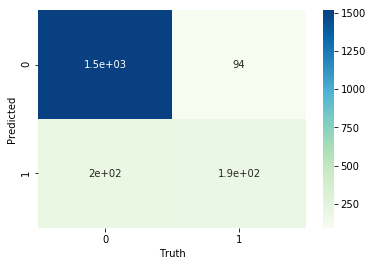

In [63]:
sea.heatmap(cm2, annot= True, cmap='GnBu')
plt.xlabel('Truth')
plt.ylabel('Predicted')

#### Applying Cross validation

In [64]:
acc = cross_val_score(estimator=d_class, X = x_train, y= y_train, cv=10, n_jobs=-1)

In [65]:
acc.mean()

0.8538727404261568

In [61]:
acc.std()

0.009720947590694834

The mean accuracy with a Decision Tree model is around 85% and also the mean variance is lower than the previous one. Thus, the model generalized well on the testing data even better.

### Parameter Tuning

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
def build_classifier(optim):
    classifier = Sequential()
    # input Layer and first inner layer with 6 nodes
    classifier.add(Dense(input_dim = 11, units = 6, activation = 'relu', kernel_initializer = 'uniform' ))
    classifier.add(Dropout(rate = 0.1))
    # second Layer 
    classifier.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'uniform' ))
    classifier.add(Dropout(rate = 0.2))
    # output Layer
    classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform' ))

    classifier.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn=build_classifier, shuffle = True)

In [67]:
parameters = {'epochs' : [100, 150, 500],
             'batch_size' : [25, 32, 64],
             'optim' : ['adam', 'rmsprop']}

In [72]:
ran_search = RandomizedSearchCV(estimator=classifier, param_distributions=parameters, n_iter = 5 , scoring= 'accuracy', cv = 10)

In [ ]:
gridsearch = gridsearch.fit(X = x_train, y = y_train )

Epoch 1/100
7200/7200 [==============================] - 3s 485us/step - loss: 0.6584 - acc: 0.7964
Epoch 2/100
7200/7200 [==============================] - 0s 67us/step - loss: 0.4966 - acc: 0.8007
Epoch 3/100
7200/7200 [==============================] - 0s 63us/step - loss: 0.4420 - acc: 0.8007
Epoch 4/100
7200/7200 [==============================] - 0s 66us/step - loss: 0.4346 - acc: 0.8007
Epoch 5/100
7200/7200 [==============================] - 0s 62us/step - loss: 0.4323 - acc: 0.8007
Epoch 6/100
7200/7200 [==============================] - 1s 70us/step - loss: 0.4321 - acc: 0.8007
Epoch 7/100
7200/7200 [==============================] - 0s 62us/step - loss: 0.4291 - acc: 0.8007
Epoch 8/100
7200/7200 [==============================] - 0s 64us/step - loss: 0.4285 - acc: 0.8007
Epoch 9/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.4297 - acc: 0.8007
Epoch 10/100
7200/7200 [==============================] - 0s 63us/step - loss: 0.4273 - acc: 0.8007
Epoch 11

Epoch 83/100
7200/7200 [==============================] - 1s 105us/step - loss: 0.4180 - acc: 0.8343
Epoch 84/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.4209 - acc: 0.8335
Epoch 85/100
7200/7200 [==============================] - 0s 64us/step - loss: 0.4151 - acc: 0.8358
Epoch 86/100
7200/7200 [==============================] - 0s 56us/step - loss: 0.4167 - acc: 0.8325
Epoch 87/100
7200/7200 [==============================] - 0s 65us/step - loss: 0.4157 - acc: 0.8337
Epoch 88/100
7200/7200 [==============================] - 0s 57us/step - loss: 0.4179 - acc: 0.8357
Epoch 89/100
7200/7200 [==============================] - 0s 60us/step - loss: 0.4140 - acc: 0.8356
Epoch 90/100
7200/7200 [==============================] - 0s 60us/step - loss: 0.4154 - acc: 0.8358
Epoch 91/100
7200/7200 [==============================] - 0s 58us/step - loss: 0.4192 - acc: 0.8344
Epoch 92/100
7200/7200 [==============================] - 0s 62us/step - loss: 0.4205 - acc: 0.834

Epoch 46/100
7200/7200 [==============================] - 0s 62us/step - loss: 0.3862 - acc: 0.8400
Epoch 47/100
7200/7200 [==============================] - 0s 64us/step - loss: 0.3851 - acc: 0.8375
Epoch 48/100
7200/7200 [==============================] - 0s 60us/step - loss: 0.3846 - acc: 0.8387
Epoch 49/100
7200/7200 [==============================] - 0s 57us/step - loss: 0.3810 - acc: 0.8418
Epoch 50/100
7200/7200 [==============================] - 0s 62us/step - loss: 0.3859 - acc: 0.8374
Epoch 51/100
7200/7200 [==============================] - 0s 59us/step - loss: 0.3837 - acc: 0.8403
Epoch 52/100
7200/7200 [==============================] - 0s 57us/step - loss: 0.3863 - acc: 0.8385
Epoch 53/100
7200/7200 [==============================] - 0s 62us/step - loss: 0.3850 - acc: 0.8361
Epoch 54/100
7200/7200 [==============================] - 0s 57us/step - loss: 0.3807 - acc: 0.8417
Epoch 55/100
7200/7200 [==============================] - 0s 61us/step - loss: 0.3854 - acc: 0.8374


7200/7200 [==============================] - 0s 67us/step - loss: 0.4253 - acc: 0.7993
Epoch 9/100
7200/7200 [==============================] - 0s 65us/step - loss: 0.4253 - acc: 0.7993
Epoch 10/100
7200/7200 [==============================] - 0s 62us/step - loss: 0.4230 - acc: 0.7993
Epoch 11/100
7200/7200 [==============================] - 0s 63us/step - loss: 0.4215 - acc: 0.7993
Epoch 12/100
7200/7200 [==============================] - 0s 65us/step - loss: 0.4224 - acc: 0.7993
Epoch 13/100
7200/7200 [==============================] - 0s 67us/step - loss: 0.4237 - acc: 0.7993
Epoch 14/100
7200/7200 [==============================] - 0s 61us/step - loss: 0.4184 - acc: 0.7993
Epoch 15/100
7200/7200 [==============================] - 0s 69us/step - loss: 0.4207 - acc: 0.7993
Epoch 16/100
7200/7200 [==============================] - 0s 61us/step - loss: 0.4204 - acc: 0.7993
Epoch 17/100
7200/7200 [==============================] - 0s 61us/step - loss: 0.4183 - acc: 0.7993
Epoch 18/100
7

7200/7200 [==============================] - 1s 134us/step - loss: 0.4268 - acc: 0.8010
Epoch 71/100
7200/7200 [==============================] - 1s 122us/step - loss: 0.4287 - acc: 0.8010
Epoch 72/100
7200/7200 [==============================] - 1s 108us/step - loss: 0.4251 - acc: 0.8010
Epoch 73/100
7200/7200 [==============================] - 1s 116us/step - loss: 0.4265 - acc: 0.8010
Epoch 74/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.4238 - acc: 0.8010
Epoch 75/100
7200/7200 [==============================] - 1s 106us/step - loss: 0.4268 - acc: 0.8010
Epoch 76/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.4286 - acc: 0.8010
Epoch 77/100
7200/7200 [==============================] - 0s 54us/step - loss: 0.4292 - acc: 0.8010
Epoch 78/100
7200/7200 [==============================] - 0s 55us/step - loss: 0.4244 - acc: 0.8010
Epoch 79/100
7200/7200 [==============================] - 0s 54us/step - loss: 0.4266 - acc: 0.8010
Epoch 

In [ ]:
best_params = gridsearch.best_params_

In [ ]:
best_acc = gridsearch.best_score_